UPDATE on V3:  
Added 2. Display an image for each shape

This kernel uses the following kernel code:
* https://www.kaggle.com/h4211819/image-size-eda
* https://www.kaggle.com/yangsaewon/basic-eda-train-test-image-distribution-check
* https://www.kaggle.com/kaerunantoka/extract-image-features

I think that this competition needs to be careful because the target is biased due to the shape of the image.  
Also, I think that the information of the image shape of the previous competition will be helpful, but because it can not be read from the kernel, I released the [dataset](https://www.kaggle.com/currypurin/diabetic-retinopathy-detection-image-size) and [discussion](https://www.kaggle.com/c/aptos2019-blindness-detection/discussion/99846).

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import sys
import os
import pickle
from tqdm import tqdm_notebook as tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
print(os.listdir('../data'))
#print(os.listdir('../data/diabetic-retinopathy-detection-image-size'))

['train.csv', 'test_final', 'sample.csv', 'org', 'train_final']


# 1. present competition

In [3]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/sample.csv')

In [4]:
len(train), len(test)

(10600, 15984)

In [8]:
#the func is from https://www.kaggle.com/toshik/image-size-and-rate-of-new-whale
def get_size_list(targets, dir_target):
    result = list()
    for target in tqdm(targets):
        img = np.array(Image.open(os.path.join(dir_target, target)))
        result.append(img.shape)
    return result

# the func is from https://www.kaggle.com/kaerunantoka/extract-image-features
def get_size(file_name_list, dir_target):
    result = list()
    #filename = images_path + filename
    for file_name in tqdm(file_name_list):
        st = os.stat(f'{dir_target}/{file_name}')
        result.append(st.st_size)
    return result

In [9]:
train['image_shape'] = get_size_list(train.id.tolist(),
                                     dir_target='../data/train_final')
test['image_shape'] = get_size_list(test.id.tolist(),
                                    dir_target='../data/test_final')
train['image_size'] = get_size(train.id.tolist(),
                               dir_target='../data/train_final')
test['image_size'] = get_size(test.id.tolist(),
                              dir_target='../data/test_final')

In [10]:
train.head()

,id,label,image_shape,image_size
0,f1.png,10,"(111, 180)",9225
1,f2.png,13,"(145, 296)",22886
2,f3.png,7,"(86, 155)",6728
3,f4.png,7,"(61, 138)",4065
4,f5.png,7,"(70, 139)",4638


In [25]:
train['image_shape'].value_counts()

(70, 130)      223
(70, 138)       98
(78, 130)       87
(62, 130)       78
(70, 155)       76
(78, 155)       74
(78, 138)       72
(70, 122)       72
(87, 155)       67
(61, 130)       59
(78, 147)       58
(95, 155)       55
(70, 147)       52
(70, 139)       51
(95, 180)       48
(45, 155)       43
(70, 163)       40
(87, 147)       40
(53, 180)       40
(70, 180)       40
(62, 122)       39
(78, 163)       39
(87, 163)       37
(79, 138)       37
(53, 155)       37
(62, 180)       36
(86, 155)       36
(79, 155)       35
(87, 180)       35
(53, 205)       35
              ... 
(70, 588)        1
(79, 1147)       1
(62, 1038)       1
(36, 180)        1
(161, 330)       1
(95, 505)        1
(45, 763)        1
(120, 555)       1
(45, 622)        1
(153, 196)       1
(129, 321)       1
(136, 346)       1
(61, 839)        1
(70, 1093)       1
(54, 755)        1
(120, 264)       1
(61, 430)        1
(112, 847)       1
(203, 305)       1
(129, 164)       1
(103, 139)       1
(79, 976)   

In [11]:
for df in [train, test]:
    df['height'] = df['image_shape'].apply(lambda x:x[0])
    df['width'] = df['image_shape'].apply(lambda x:x[1])
    df['width_height_ratio'] = df['height'] / df['width']
    df['width_height_added'] = df['height'] + df['width']

In [12]:
train.head()

,id,label,image_shape,image_size,height,width,width_height_ratio,width_height_added
0,f1.png,10,"(111, 180)",9225,111,180,0.616667,291
1,f2.png,13,"(145, 296)",22886,145,296,0.489865,441
2,f3.png,7,"(86, 155)",6728,86,155,0.554839,241
3,f4.png,7,"(61, 138)",4065,61,138,0.442029,199
4,f5.png,7,"(70, 139)",4638,70,139,0.503597,209


In [13]:
train.describe()

,label,image_size,height,width,width_height_ratio,width_height_added
count,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000
mean,7.330189,11977.460094,87.949717,282.874811,0.406692,370.824528
std,4.076636,11904.726816,39.443621,220.860838,0.199841,226.195646
min,1.000000,859.000000,20.000000,80.000000,0.040208,100.000000
25%,4.000000,5250.000000,62.000000,155.000000,0.248826,233.000000
50%,7.000000,7985.500000,78.000000,205.000000,0.421769,292.000000
75%,11.000000,14619.250000,103.000000,297.000000,0.547872,409.000000
max,14.000000,264808.000000,812.000000,1378.000000,4.100719,1760.000000


In [14]:
test.describe()

,label,image_size,height,width,width_height_ratio,width_height_added
count,15984.0,15984.000000,15984.000000,15984.000000,15984.000000,15984.000000
mean,1.0,13845.501314,91.747623,301.293606,0.415928,393.041229
std,0.0,13751.905428,47.613943,244.924803,0.218516,250.786421
min,1.0,1423.000000,28.000000,96.000000,0.038462,141.000000
25%,1.0,5515.000000,62.000000,155.000000,0.258537,233.000000
50%,1.0,9338.500000,78.000000,205.000000,0.426829,300.000000
75%,1.0,17712.500000,104.000000,313.250000,0.561290,457.000000
max,1.0,353816.000000,870.000000,1378.000000,2.911565,1730.000000


In [15]:
#train.to_csv('../data/train_meta.csv', index=False)
#test.to_csv('../data/test_meta.csv', index=False)

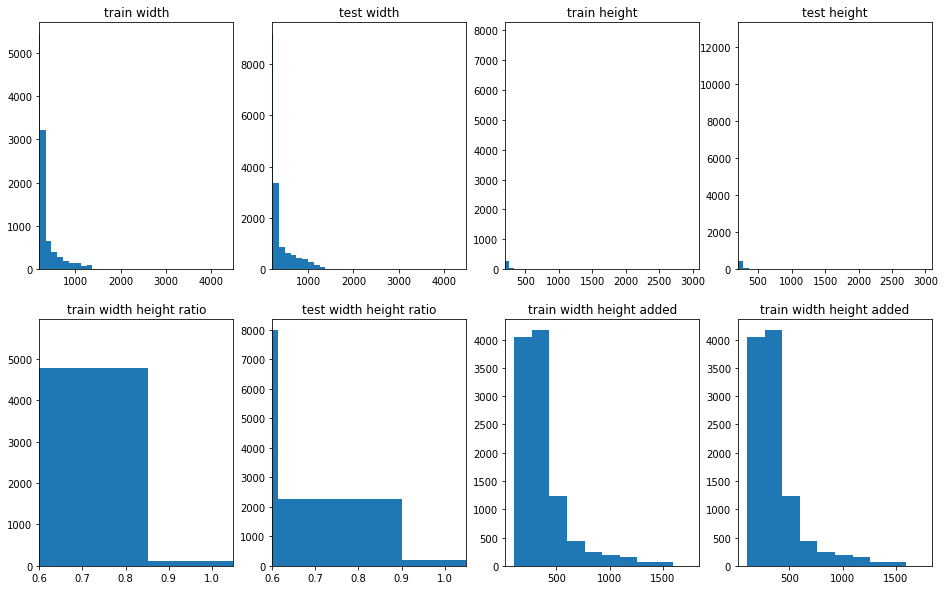

In [16]:
fig = plt.figure(figsize=(16,10))
plt.subplot(241)
plt.hist(train['width'])
plt.title("train width")
plt.xlim(200, 4500)

plt.subplot(242)
plt.hist(test['width'])
plt.title("test width")
plt.xlim(200, 4500)

plt.subplot(243)
plt.hist(train['height'])
plt.title("train height")
plt.xlim(200, 3100)

plt.subplot(244)
plt.hist(test['height'])
plt.title("test height")
plt.xlim(200, 3100)

plt.subplot(245)
plt.hist(train['width_height_ratio'])
plt.title("train width height ratio")
plt.xlim(0.6, 1.05)


plt.subplot(246)
plt.hist(test['width_height_ratio'])
plt.title("test width height ratio")
plt.xlim(0.6, 1.05)

plt.subplot(247)
plt.hist(train['width_height_added'])
plt.title("train width height added")

plt.subplot(248)
plt.hist(train['width_height_added'])
plt.title("train width height added");

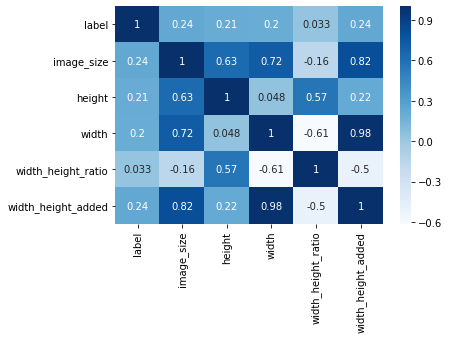

In [17]:
sns.heatmap(train.corr(), cmap=plt.cm.Blues, annot=True)

In [20]:
train_meta = train.groupby(['width', 'height', 'label']).agg({'label':'count'}).unstack('label').fillna(0)
train_meta.columns = [f'{i[0]}_{i[1]}' for i in train_meta.columns]
train_meta['train_count'] = train_meta.sum(axis=1)

test_meta = test.groupby(['width', 'height']).agg({'id':'count'}).rename(columns={'id':'pub_test_count'})
count_ratio = train_meta.join(test_meta, how='outer')

for i in range(5):
    count_ratio.loc[:, f'{i}_ratio'] = count_ratio.iloc[:, i] / count_ratio['train_count']

count_ratio = count_ratio.fillna(0)

count_ratio = count_ratio.astype({'label_0': int, 'label_1': int, 'label_2': int,
                                  'label_3': int, 'label_4': int})
count_ratio = count_ratio.astype({'train_count': int, 'pub_test_count': int})

count_ratio.reset_index(inplace=True)
count_ratio.set_index(['width', 'height', 'train_count', 'pub_test_count'], inplace=True)

KeyError: 'Only a column name can be used for the key in a dtype mappings argument.'

In [14]:
count_ratio

,,,,diagnosis_0,diagnosis_1,diagnosis_2,diagnosis_3,diagnosis_4,0_ratio,1_ratio,2_ratio,3_ratio,4_ratio
width,height,train_count,pub_test_count,,,,,,,,,,
474,358,2,0,0,0,1,0,1,0.000000,0.000000,0.500000,0.000000,0.500000
640,480,42,1403,0,0,33,5,4,0.000000,0.000000,0.785714,0.119048,0.095238
768,576,0,2,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
819,614,287,45,279,7,1,0,0,0.972125,0.024390,0.003484,0.000000,0.000000
1050,1050,974,69,901,19,39,2,13,0.925051,0.019507,0.040041,0.002053,0.013347
1467,1110,2,2,0,0,2,0,0,0.000000,0.000000,1.000000,0.000000,0.000000
1476,1117,14,2,10,0,0,2,2,0.714286,0.000000,0.000000,0.142857,0.142857
1504,1000,92,0,0,2,63,9,18,0.000000,0.021739,0.684783,0.097826,0.195652
1844,1226,61,0,0,13,28,1,19,0.000000,0.213115,0.459016,0.016393,0.311475


* Training data has different target distribution for each image shape.
  * For example 1050x1050 is high ratio of class_0, 2136x3216 is high ratio of class_2
* If we leave the image shape information in the preprocessed image, there is a possibility of overfitting, so be very careful.
* Let's look at the images.

# 2.Display an image for each shape

In [23]:
def im_show(height, width, num):
    tmp = train[(train['width'] == width) & (train['height'] == height)].id
    dir_target = '../data/train_final'
    id = tmp.values[num]
    img = Image.open(os.path.join(dir_target, id))
    plt.imshow(img.resize((256, 256)))
    plt.tick_params(bottom=False,
                    left=False,
                    right=False,
                    top=False,
                    labelbottom=False,
                    labelleft=False,
                    labelright=False,
                    labeltop=False)
    value = train.loc[train['id'] == id, :].values[0]
    plt.title(f'({value[4]},{value[5]})->(256,256)\n {id}, label:{value[1]}')

def five_img_plot(height, width):
    print('-' * 10)
    print(f'shape({height}, {width})')
    plt.figure(figsize=(16, 4))
    for i in range(5):
        plt.subplot(1,5,i+1)
        im_show(height, width, i)
    plt.show()

----------
shape(480, 640)


IndexError: index 0 is out of bounds for axis 0 with size 0

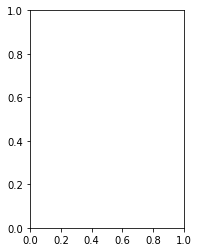

In [24]:
five_img_plot(480, 640)
five_img_plot(614, 819)
five_img_plot(1050, 1050)
five_img_plot(1536, 2048)
five_img_plot(1736, 2416)
five_img_plot(1958, 2588)
five_img_plot(2588, 3388)